In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
from fastai.imports import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/case_study/'

In [3]:
data=pd.read_csv(f'{PATH}AllData_new.csv')

In [4]:
data.tail()

,D[-],D_dot[1/s],p[-],p_dot[1/s],Mises[MPa],Hydro[MPa],teq[-],eeq[-],V[mm^3],Sig_tri[-],LoadingState
3388,0.248556,1.983663,0.062001,0.116834,284.832377,18.745354,0.061949,0.001537,0.000212,0.066052,7.0
3389,0.248579,1.948299,0.062003,0.116802,284.825419,18.743141,0.061950,0.001537,0.000212,0.066044,7.0
3390,0.248600,1.886919,0.062004,0.110842,284.818513,18.740990,0.061950,0.001537,0.000212,0.066037,7.0
3391,0.248601,1.059331,0.062004,0.135451,284.818233,18.740799,0.061951,0.001537,0.000212,0.066036,7.0
3392,0.248601,1.091343,0.062004,-0.737903,284.817976,18.740666,0.061951,0.001537,0.000212,0.066036,7.0


In [5]:
data.shape

(3393, 11)

In [6]:
cols = list(data.columns.values)
cols

['D[-]',
 'D_dot[1/s]',
 'p[-]',
 'p_dot[1/s]',
 'Mises[MPa]',
 'Hydro[MPa]',
 'teq[-]',
 'eeq[-]',
 'V[mm^3]',
 'Sig_tri[-]',
 'LoadingState']

In [7]:
damage=data.pop('D[-]')

In [8]:
data.insert(0,'D[-]',damage)

In [9]:
data.tail()

,D[-],D_dot[1/s],p[-],p_dot[1/s],Mises[MPa],Hydro[MPa],teq[-],eeq[-],V[mm^3],Sig_tri[-],LoadingState
3388,0.248556,1.983663,0.062001,0.116834,284.832377,18.745354,0.061949,0.001537,0.000212,0.066052,7.0
3389,0.248579,1.948299,0.062003,0.116802,284.825419,18.743141,0.061950,0.001537,0.000212,0.066044,7.0
3390,0.248600,1.886919,0.062004,0.110842,284.818513,18.740990,0.061950,0.001537,0.000212,0.066037,7.0
3391,0.248601,1.059331,0.062004,0.135451,284.818233,18.740799,0.061951,0.001537,0.000212,0.066036,7.0
3392,0.248601,1.091343,0.062004,-0.737903,284.817976,18.740666,0.061951,0.001537,0.000212,0.066036,7.0


In [10]:
#cat_vars = []
contin_vars = ['D[-]',
 'D_dot[1/s]',
 'p[-]',
 'p_dot[1/s]',
 'Mises[MPa]',
 'Hydro[MPa]',
 'teq[-]',
 'eeq[-]',
 'V[mm^3]',
 'Sig_tri[-]',
 'LoadingState']


In [11]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_test = 500
n_trn = len(data)-n_test
data_train, data_test = split_vals(data, n_trn)

data_train.shape, data_test.shape

((2893, 11), (500, 11))

In [12]:
dep = 'D[-]'
joined_train= data_train[contin_vars].copy() #data_train[contin_vars+cat_vars].copy()
joined_test = data_test[contin_vars].copy() #data_test[contin_vars+cat_vars].copy()
joined_test[dep] = 0
joined_test.tail()

,D[-],D_dot[1/s],p[-],p_dot[1/s],Mises[MPa],Hydro[MPa],teq[-],eeq[-],V[mm^3],Sig_tri[-],LoadingState
3388,0,1.983663,0.062001,0.116834,284.832377,18.745354,0.061949,0.001537,0.000212,0.066052,7.0
3389,0,1.948299,0.062003,0.116802,284.825419,18.743141,0.061950,0.001537,0.000212,0.066044,7.0
3390,0,1.886919,0.062004,0.110842,284.818513,18.740990,0.061950,0.001537,0.000212,0.066037,7.0
3391,0,1.059331,0.062004,0.135451,284.818233,18.740799,0.061951,0.001537,0.000212,0.066036,7.0
3392,0,1.091343,0.062004,-0.737903,284.817976,18.740666,0.061951,0.001537,0.000212,0.066036,7.0


In [13]:
for v in contin_vars:
    joined_train[v] = joined_train[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

In [16]:
df_train, y_train, nas,mapper = proc_df(joined_train,dep, do_scale= True)
df_test, y_test, nas,mapper = proc_df(joined_test,dep, do_scale= True)

In [17]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_train, y_train)
m.score(df_test,y_test)

/home/p_abhijeet666/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0

In [18]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [19]:
rmse(m.predict(df_test), y_test)

0.10911808115726696

In [26]:
preds=m.predict(df_test)
preds[360]

0.07903295699532689

In [30]:
fi = rf_feat_importance(m, df_train);
fi[:]

,cols,imp
3,Mises[MPa],0.433534
0,D_dot[1/s],0.295065
6,eeq[-],0.145289
1,p[-],0.049748
4,Hydro[MPa],0.034760
5,teq[-],0.026387
7,V[mm^3],0.008054
8,Sig_tri[-],0.006664
2,p_dot[1/s],0.000421
9,LoadingState,0.000080


In [39]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

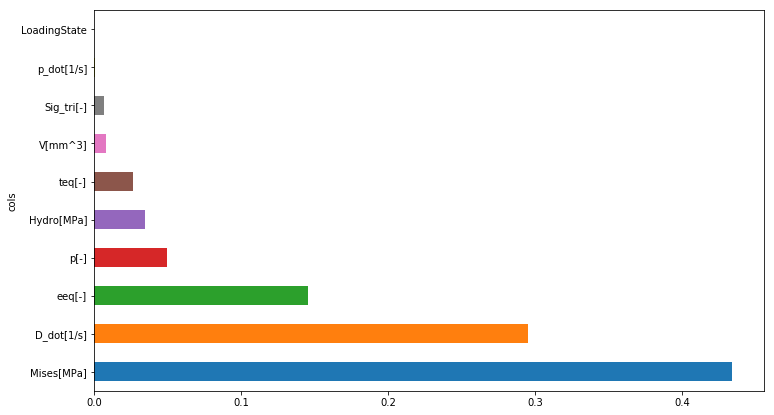

In [40]:
plot_fi(fi[:]);

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)